In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('/content/drive/My Drive/ManojSirIntern/data_final.csv')

In [7]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [8]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [ ]:
Y

In [ ]:
df

In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(random_state=0)

clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      6044
           1       0.54      0.03      0.05       725

    accuracy                           0.89      6769
   macro avg       0.72      0.51      0.50      6769
weighted avg       0.86      0.89      0.85      6769



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8933372728615748

In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [ ]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  6047  out of  6769


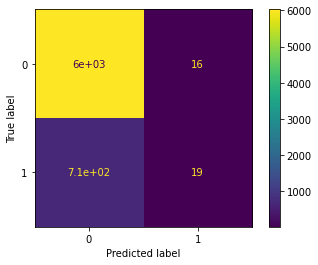

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

Confusion matrix, without normalization
[[6028   16]
 [ 706   19]]
Normalized confusion matrix
[[0.99735275 0.00264725]
 [0.9737931  0.0262069 ]]


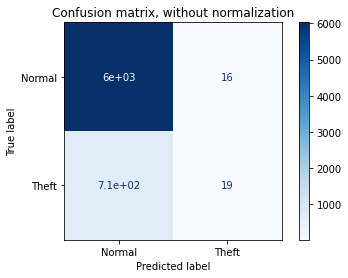

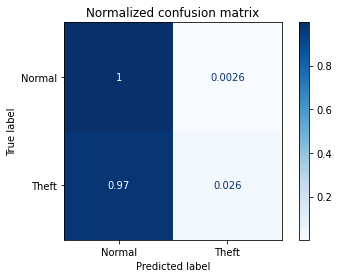

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
probs = clf.predict_proba(x_test)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

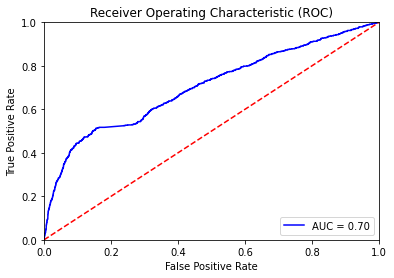

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = # false_positive_rate
y = # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)